# Introduction to map projections

### Setup: Installing necessary libraries

In [2]:
# install any libraries we need for map projections

!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 65.7 MB/s eta 0:00:00


In [3]:
# import the libraries we need to load data and create map projections

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

The [geopandas library](https://geopandas.org/en/stable/docs/user_guide/io.html) is used to process and display shapefiles, a data format that contains geographic data, in GeoDataFrames (which are a type of dataframe that just contains a type of 'geometry' - either point, line or polygons (data in the form of shapes, such as provinces)).  

These shapes in a GeoDataFrame (aka polygons) are a bunch of coordinates in a space. A coordinate reference system, or CRS, informs Python on how these groups of coordinates relate to actual places on Earth.

A map projection is a "projected" coordinate system, or a specific way of translating latitudes and longitudes onto a surface.

### Loading the shapefile

Let's work with a 2015 shapefile of Iran's [first-level administrative divisions](https://geodata.lib.utexas.edu/catalog/stanford-dv126wm3595), or Iran's provinces. According to its description, the province boundaries are mapped based on the WGS84 coordinate system. 

WGS84 stands for the World Geodetic System. It consists of a reference ellipsoid (an [ellipsoid](https://mathworld.wolfram.com/Ellipsoid.html) or sphere-like shape that closely resembles the Earth), a standard coordinate system (where x, y and z (height) represent a 3-dimensional space), altitude data (or height data), and a geoid (which helps to define sea level). The WGS84 coordinate reference system uses the Earth’s center mass as the coordinate origin.

In [4]:
# loading the shapefile with geopandas (gpd)

raw_shp_url = "https://raw.githubusercontent.com/ICFJ-Computational-Journaism/datasets/main/csv/irn_adm_unhcr_20190514_shp/irn_admbnda_adm1_unhcr_20190514.shp"
iran_provinces = gpd.read_file(raw_shp_url)

In [ ]:
# loading the first five rows of the GeoDataFrame (of the shapefile)

iran_provinces.head(5)

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_FA,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1FA,ADM1ALT2FA,ADM0_EN,ADM0_FA,ADM0_PCODE,date,validOn,validTo,geometry
0,4.346753,0.523109,Alborz,البرز‎,IR001,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((50.49594 36.34221, 50.50150 36.34166..."
1,10.218890,1.845273,Ardabil,اردبیل,IR002,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((48.03206 39.69253, 48.09512 39.63819..."
2,16.019141,2.088545,Bushehr,بوشهر,IR003,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"MULTIPOLYGON (((51.41462 27.90553, 51.41510 27..."
3,7.087819,1.555897,Chaharmahal and Bakhtiari,چهارمحال و بختیاری,IR004,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((49.72980 32.80907, 49.73119 32.80851..."
4,14.145806,4.646606,East Azerbaijan,آذربایجان شرقی,IR005,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((47.36634 39.41979, 47.37967 39.40590..."


We can confirm that the CRS (coordinate reference system) of this shapefile is WGS84.

In [ ]:
iran_provinces.crs # It should output information about the 2-dimensional CRS, WGS84

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Working with coordinate reference systems (CRS)

Let's say we wanted to map Iran's provinces, but the shapefile that we currently have has the wrong CRS.

If we wanted to change the CRS from WGS84 (the default) to, say, an [Albers Equal Area projection](https://pro.arcgis.com/en/pro-app/latest/help/mapping/properties/albers.htm) — a conic projection and equal-area (equivalent) projection that usually result in distorted shapes, directions, angles, and distances — we can change the CRS with a few lines of code and knowledge of which EPSG code corresponds with the projection you want to map coordinates onto.

[EPSG codes](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/epsg-proj4-coordinate-reference-system-formats-python/) are 4-5 digit numbers that represent CRSs.

In this case, the EPSG code that corresponds with an Albers Equal Area projection is [EPSG:9822](https://epsg.io/9822-method).

We can make a copy of our shapefile data (good practice so that we don't alter raw data) and then change the coordinates.

In [ ]:
# Copying our geographic data
In [6]: iran_provinces_copy = iran_provinces.copy()

# Mapping our polygons/shape data to a new coordinate system with 'to_crs' 
In [7]: iran_provinces_copy = iran_provinces_copy.to_crs(epsg=9822)

Now we can load our copy of `iran_provinces`, which should now be mapped based on the Albers Equal Area projection, and compare how the geometries of the province borders have changed. 

In [ ]:
iran_provinces.head(5)

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_FA,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1FA,ADM1ALT2FA,ADM0_EN,ADM0_FA,ADM0_PCODE,date,validOn,validTo,geometry
0,4.346753,0.523109,Alborz,البرز‎,IR001,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((50.49594 36.34221, 50.50150 36.34166..."
1,10.218890,1.845273,Ardabil,اردبیل,IR002,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((48.03206 39.69253, 48.09512 39.63819..."
2,16.019141,2.088545,Bushehr,بوشهر,IR003,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"MULTIPOLYGON (((51.41462 27.90553, 51.41510 27..."
3,7.087819,1.555897,Chaharmahal and Bakhtiari,چهارمحال و بختیاری,IR004,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((49.72980 32.80907, 49.73119 32.80851..."
4,14.145806,4.646606,East Azerbaijan,آذربایجان شرقی,IR005,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((47.36634 39.41979, 47.37967 39.40590..."


In [ ]:
iran_provinces_copy.head(5)

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_FA,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1FA,ADM1ALT2FA,ADM0_EN,ADM0_FA,ADM0_PCODE,date,validOn,validTo,geometry
0,4.346753,0.523109,Alborz,البرز‎,IR001,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((5767361.246 1728858.391, 5767819.528..."
1,10.218890,1.845273,Ardabil,اردبیل,IR002,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((5389668.272 1936948.187, 5397383.756..."
2,16.019141,2.088545,Bushehr,بوشهر,IR003,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"MULTIPOLYGON (((6346332.190 971070.497, 634637..."
3,7.087819,1.555897,Chaharmahal and Bakhtiari,چهارمحال و بختیاری,IR004,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((5913566.761 1354981.091, 5913712.011..."
4,14.145806,4.646606,East Azerbaijan,آذربایجان شرقی,IR005,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,2019-04-09,2019-05-14,NaN,"POLYGON ((5355145.705 1882126.080, 5356908.989..."


We can also map these two shapefiles to see how they differ visually. (Remember that when we use the geopandas function `plot()` that the x and y axes represent latitude and longitude respectively.)

Text(0.5, 1.0, "Iran's provinces: WGS84")

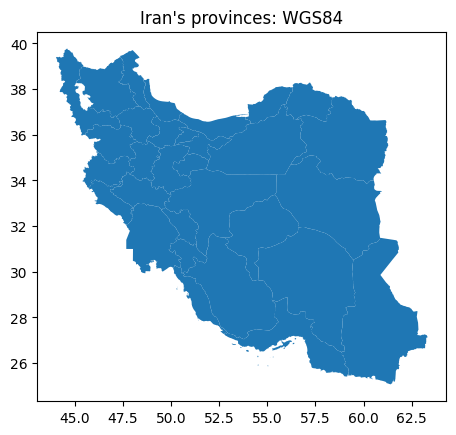

In [ ]:
# Mapping the Iranian provinces with the WGS84 projection
iran_provinces.plot()

# Adding title for WGS84 projection
plt.title("Iran's provinces: WGS84")

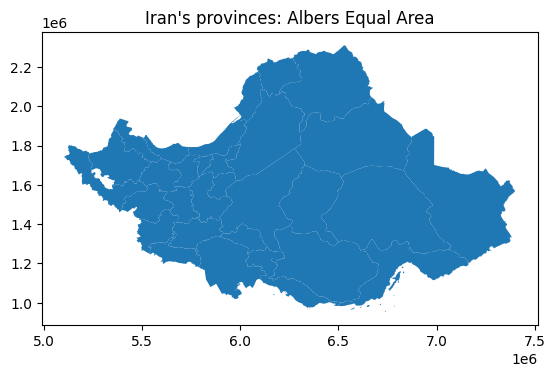

In [ ]:
# Mapping the Iranian provinces with the Albers Equal Area projection
iran_provinces_copy.plot();

# Adding title for Albers Equal Area projection
plt.title("Iran's provinces: Albers Equal Area");

The Albers Equal Area projection is clearly much different than the standard WGS84 projection — Iran is essentially rotated counter-clockwise 90 degrees because the Albers Equal Area map turns inwards and surrounds the Arctic (with all continents surrounding around it). 

### More resources for exploring map projections

* The [map projections chapter](https://automating-gis-processes.github.io/CSC18/lessons/L2/projections.html) from Intro to Python GIS provides a more comprehensive walk-through of map projections and is the reference chapter that this lesson is based off of
* [Basics of map coordinate systems](https://www.l3harrisgeospatial.com/Learn/Blogs/Blog-Details/ArtMID/10198/ArticleID/15597/Basics-of-Map-Coordinate-Systems) (and more explanations for terms used to describe different coordinate reference systems, such as WGS84)

